In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret
import seaborn as sns

In [ ]:
data = pd.read_excel('cia_países.xlsx', index_col = 0)

In [ ]:
data.head() # Get a sense of what the data looks like

,Continent,Area (km²),Population,GDP (USD),Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),Militar Expenditures (% of GDP)
Name,,,,,,,,,,,,,
Afghanistan,Asia,652230,37466414,2065,23.90,23.90,7.0,7.870,4717013.0,13.50,46.0,34903.0,1.2
Akrotiri,Middle East,123,18195,0,NaN,NaN,NaN,0.885,NaN,NaN,1.0,NaN,NaN
Albania,Europe,28748,3088385,13965,5.83,5.83,71.8,102.430,2196613.0,71.85,3.0,3945.0,1.3
Algeria,Africa,2381740,43576691,11511,11.70,11.70,27.5,131.085,24819531.0,59.58,149.0,104000.0,6.0
American Samoa,Oceania,224,46366,11200,29.80,29.80,12.2,1.000,17000.0,31.30,3.0,241.0,NaN


In [ ]:
data.info() # View the data types each column takes

<class 'pandas.core.frame.DataFrame'>
Index: 254 entries, Afghanistan to Zimbabwe
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Continent                                254 non-null    object 
 1   Area (km²)                               254 non-null    object 
 2   Population                               254 non-null    object 
 3   GDP (USD)                                254 non-null    int64  
 4   Unemployment Rate                        220 non-null    float64
 5   Taxes (% of GDP)                         220 non-null    float64
 6   External Debt (USD)                      212 non-null    float64
 7   Exchange Rate (USD)                      239 non-null    float64
 8   Internet Users                           230 non-null    float64
 9   Internet Users Percentage of Population  230 non-null    float64
 10  Airports                                

In [ ]:
data.shape # Know how many records are there

(254, 13)

In [ ]:
for column in data:
    
    print(column, '\n\n', data[column].unique(), '\n')

Continent 

 ['Asia' 'Middle East' 'Europe' 'Africa' 'Oceania'
 'Central America and the Caribbean' 'Antarctic Region' 'South America'
 'Southeast Asia' 'North America' 'Political Map of the World'
 'European Union' 'Antarctic RegionAfrica' 'Arctic Region' 'AsiaEurope'
 'World'] 

Area (km²) 

 [652230 123 28748 2381740 224 468 1246700 91 14.2 443 2780400 29743 180 5
 7741220 83871 86600 13880 760 148460 430 207600 30528 22966 112622 54
 38394 1098581 51197 581730 49 8515770 60 151 5765 110879 274200 676578
 27830 4033 181035 475440 9984670 264 622984 1.284 756102 9596960 135 6 14
 1138910 2235 2344858 342000 236 3 51100 322463 56594 110860 444 9251
 78867 43094 131 23200 751 48670 283561 1001450 21041 28051 117600 45228
 17364 1104300 4236351 12173 1393 18274 338145 643801 4167 'total' 267667
 11300 69700 357022 238533 7 131957 2166086 344 544 108889 78 245857 36125
 214969 27750 412 0 112090 1108 93028 103000 3287263 1904569 1648195
 438317 70273 572 21937 301340 10991 377 377915 116

We note the presence of some peculiar values. In the 'Name' and 'Continent' columns, there's a record for the world which might skew the results. Additionally there are some non-numerical values in the 'Area (km²)' and 'Population' columns.

In [ ]:
def boundaries(gdp): # We start by creating a function that labels each country's GDP 
    
    
    if gdp >= 50 and gdp <= 5000:
    
        return 1

    elif gdp > 5000 and gdp <= 25000:
        
        return 2

    elif gdp > 25000:
        
        return 3


def not_int(value): # This function will come in handy when trying to define the imputing policies
    
    try:
    
        float(value)
        return True

    except:
        
        return False



In [ ]:
data.drop('World', axis = 0, inplace = True)# Drop the World record
data = data[data['GDP (USD)'] > 50] # As per request, drop all records with a GDP lower than 50
data = pd.get_dummies(data, columns = ['Continent'])
data['Target'] = data['GDP (USD)'].apply(boundaries) # Add column named Label which contains the target label for each country
data.drop(labels = 'GDP (USD)', axis = 1, inplace = True) # Drop the GDP column, since GDP is the best predictor of GDP

In the next few cells we're going to visualize the skewness of the data to determine if mean, mode, or median are the most appropriate imputing techniques. We're doing this because since we have so few records, we would hate to skew the results ourselves by abusing the dropna

<Axes: >

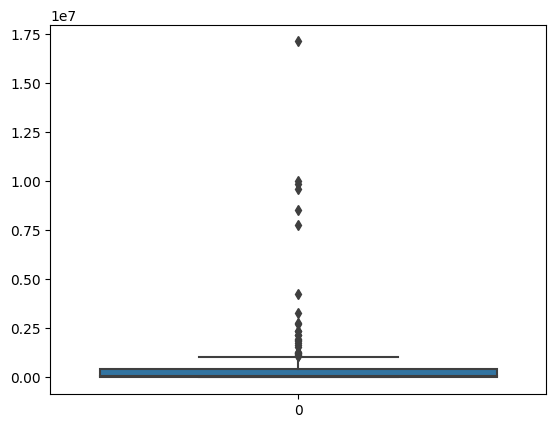

In [ ]:
sns.boxplot(data[data['Area (km²)'].apply(not_int)]['Area (km²)'])

<Axes: xlabel='Area (km²)', ylabel='Density'>

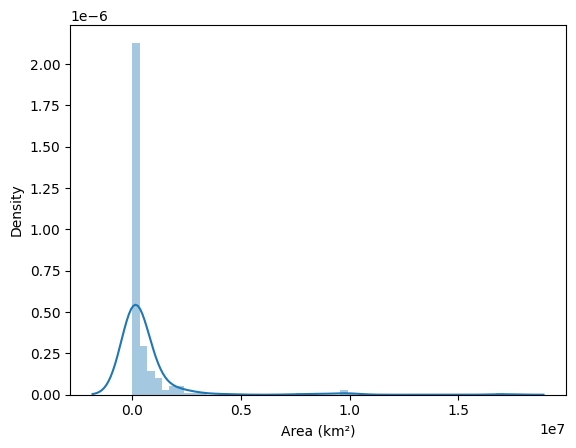

In [ ]:
sns.distplot(data[data['Area (km²)'].apply(not_int)]['Area (km²)'])

<Axes: >

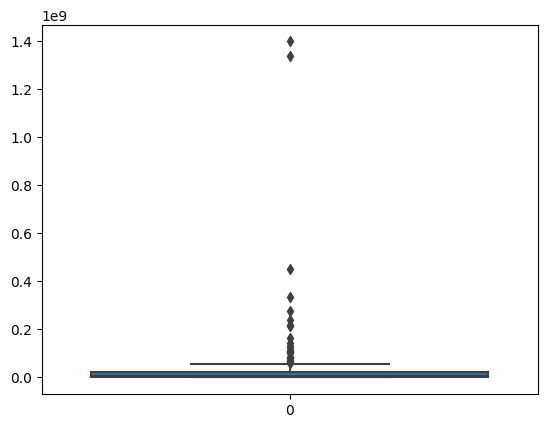

In [ ]:
sns.boxplot(data[data['Population'].apply(not_int)]['Population'])

<Axes: xlabel='Population', ylabel='Density'>

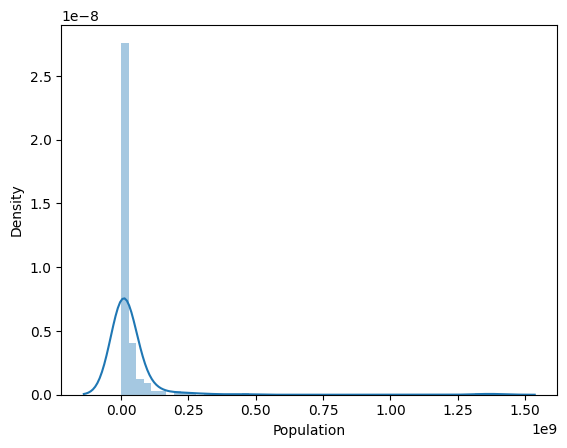

In [ ]:
sns.distplot(data[data['Population'].apply(not_int)]['Population'])

<Axes: >

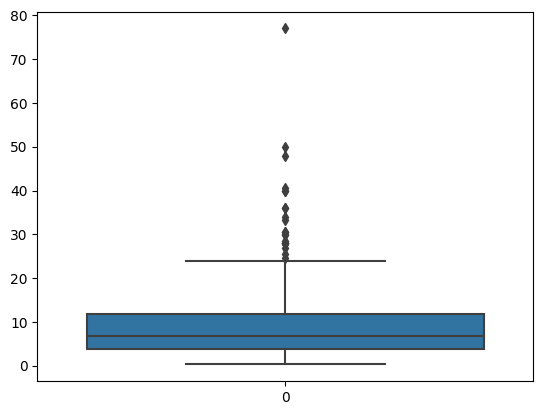

In [ ]:
sns.boxplot(data['Unemployment Rate'])

<Axes: xlabel='Unemployment Rate', ylabel='Density'>

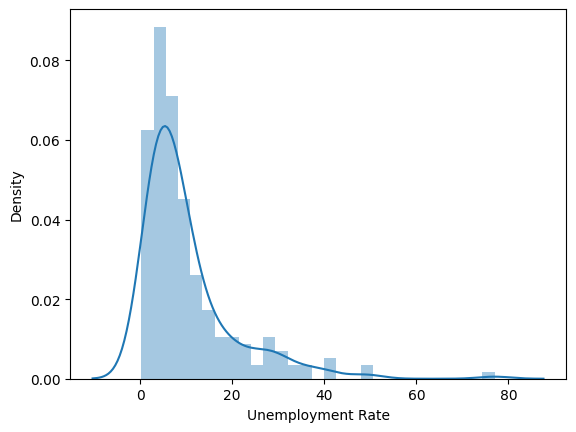

In [ ]:
sns.distplot(data['Unemployment Rate'])

<Axes: >

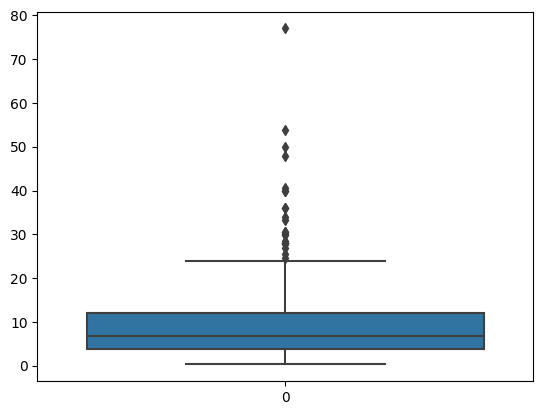

In [ ]:
sns.boxplot(data['Taxes (% of GDP)'])

<Axes: xlabel='Taxes (% of GDP)', ylabel='Density'>

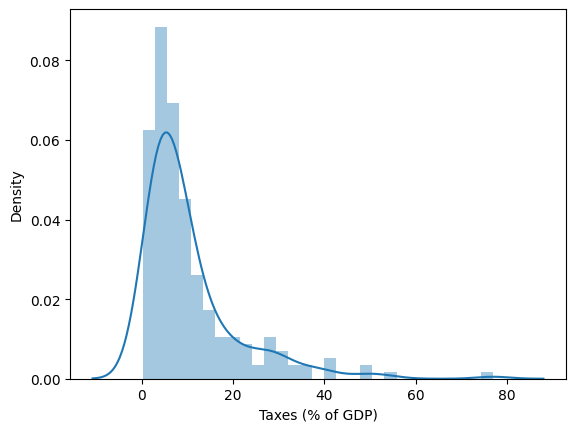

In [ ]:
sns.distplot(data['Taxes (% of GDP)'])

<Axes: >

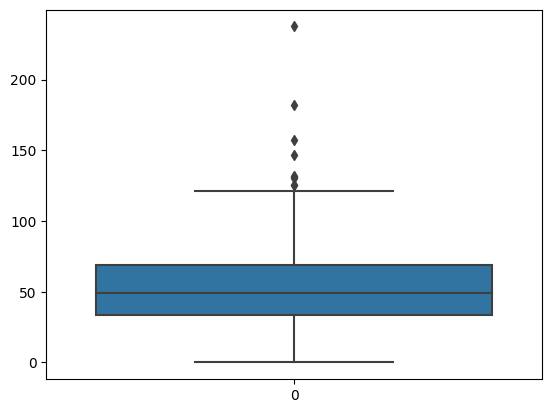

In [ ]:
sns.boxplot(data['External Debt (USD)'])

<Axes: xlabel='External Debt (USD)', ylabel='Density'>

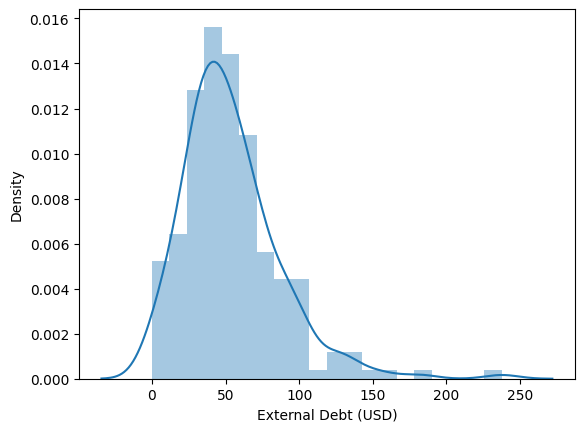

In [ ]:
sns.distplot(data['External Debt (USD)'])

<Axes: >

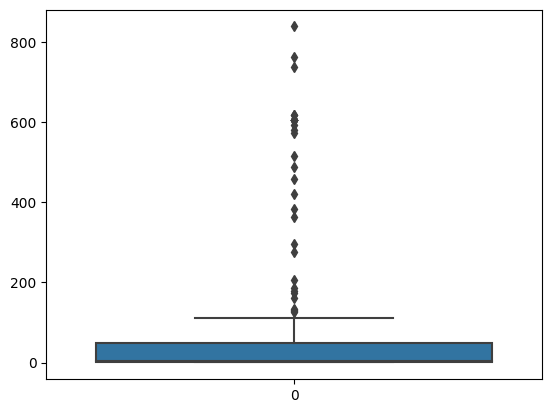

In [ ]:
sns.boxplot(data['Exchange Rate (USD)'])

<Axes: xlabel='Exchange Rate (USD)', ylabel='Density'>

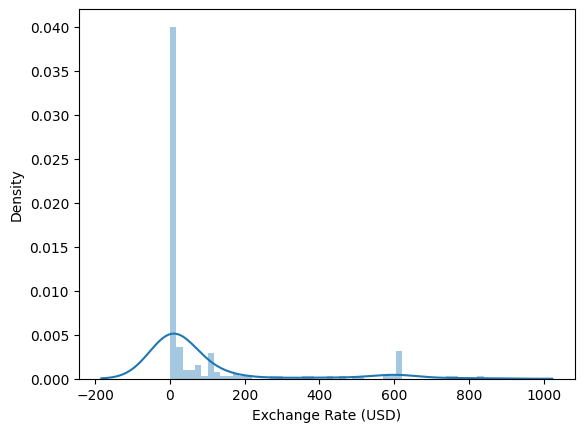

In [ ]:
sns.distplot(data['Exchange Rate (USD)'])

<Axes: >

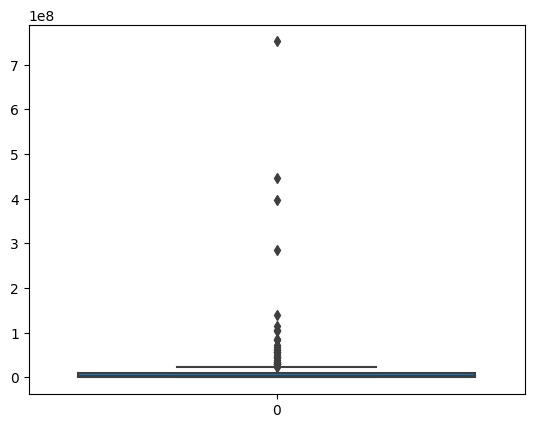

In [ ]:
sns.boxplot(data['Internet Users'])

<Axes: xlabel='Internet Users', ylabel='Density'>

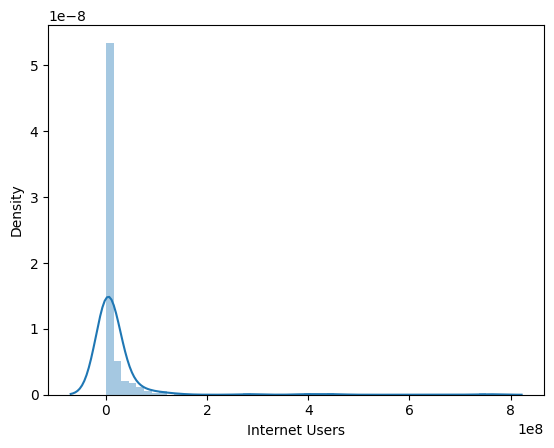

In [ ]:
sns.distplot(data['Internet Users'])

<Axes: >

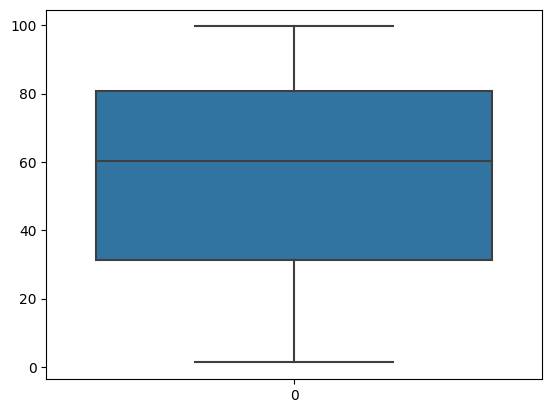

In [ ]:
sns.boxplot(data['Internet Users Percentage of Population'])

<Axes: xlabel='Internet Users Percentage of Population', ylabel='Density'>

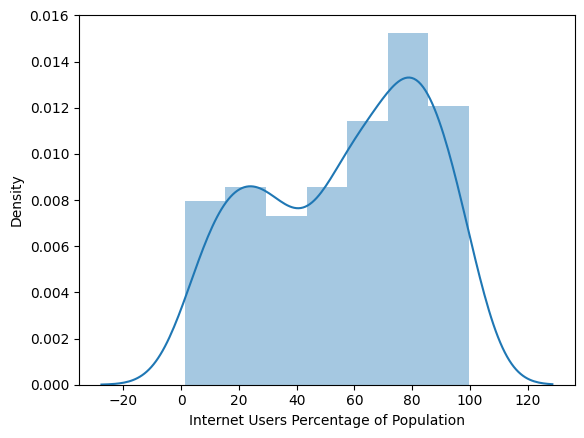

In [ ]:
sns.distplot(data['Internet Users Percentage of Population'])

<Axes: >

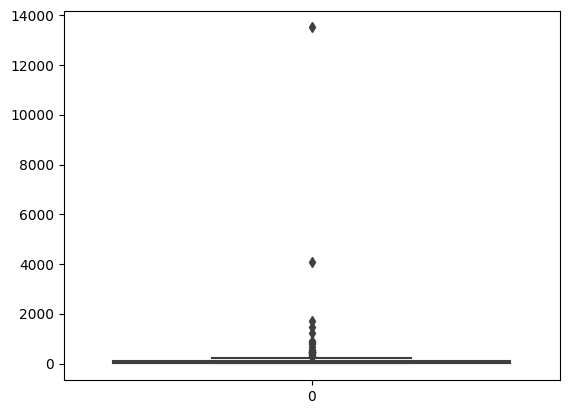

In [ ]:
sns.boxplot(data['Airports'])

<Axes: xlabel='Airports', ylabel='Density'>

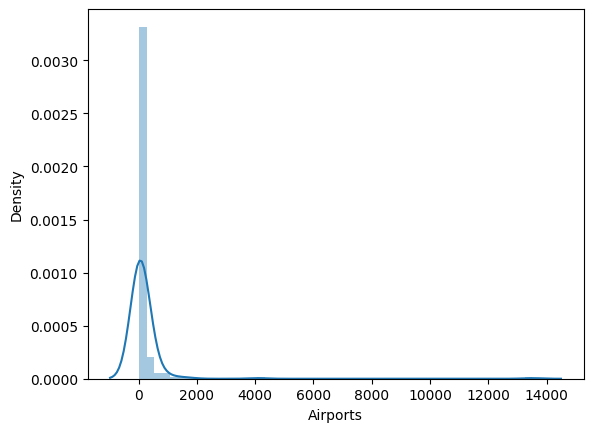

In [ ]:
sns.distplot(data['Airports'])

<Axes: >

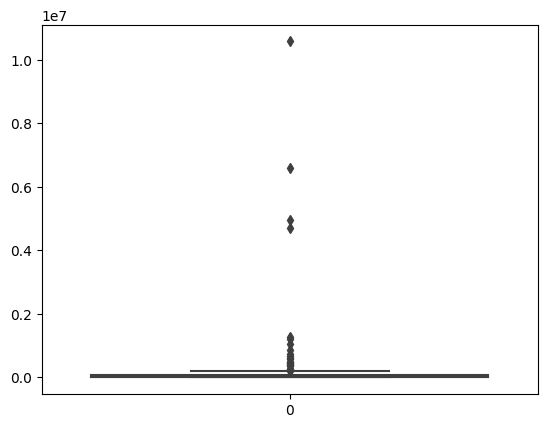

In [ ]:
sns.boxplot(data['Roadways (km)'])

<Axes: xlabel='Roadways (km)', ylabel='Density'>

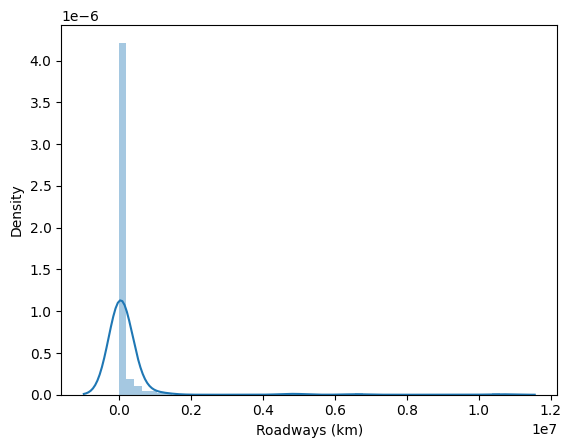

In [ ]:
sns.distplot(data['Roadways (km)'])

<Axes: >

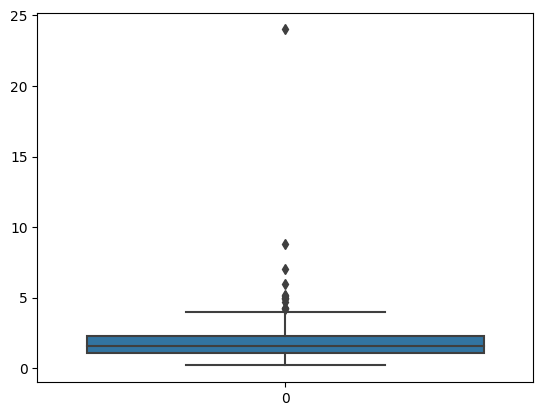

In [ ]:
sns.boxplot(data['Militar Expenditures (% of GDP)'])

<Axes: xlabel='Militar Expenditures (% of GDP)', ylabel='Density'>

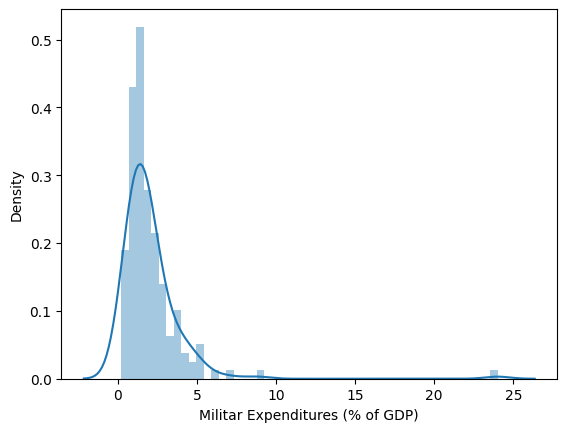

In [ ]:
sns.distplot(data['Militar Expenditures (% of GDP)'])

For what we've seen, with the exception of 'Internet Users Percentage of Population' most of the data is left skewed. Thus we've decided to apply the median as the imputation technique

In [ ]:
impute_cols = ['Area (km²)', 'Population', 'Unemployment Rate', 'Taxes (% of GDP)', 'External Debt (USD)', 'Exchange Rate (USD)', 'Internet Users', 'Internet Users Percentage of Population', 'Airports', 'Roadways (km)', 'Militar Expenditures (% of GDP)']

In [ ]:
# Here we replace each non-numeric value with the median of the column

for index, row in data.iterrows():
    
    # For each index, and entry
    
    for column, value in row.items():
        
        # For each column and value
        
        if column in impute_cols:
            
            # We do this here mainly to avoid some shenanigans with the non-numeric columns ('Name' & 'Continent')
            
            replace_val = data[data[column].apply(not_int)][column].median()
            
            if isinstance(value, str):
                
                data.at[index, column] = replace_val

In [ ]:
for column in impute_cols: # Here's a good ol' fillna
    data[column] = data[column].fillna(data[column].median())

In [ ]:
# Since the data has a few too many outliers, we will use the Z-score scaling
from sklearn.preprocessing import StandardScaler

# Separate the features (attributes) from the target column
X = data.drop('Target', axis=1)

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Fit and transform the feature columns using the scaler
X_zscore = scaler.fit_transform(X)

# Assign the transformed feature columns back to the original DataFrame
zscore_data = data.copy(deep=True)

zscore_data[zscore_data.columns[:-1]] = X_zscore

In [ ]:
zscore_data

,Area (km²),Population,Unemployment Rate,Taxes (% of GDP),External Debt (USD),Exchange Rate (USD),Internet Users,Internet Users Percentage of Population,Airports,Roadways (km),...,Continent_AsiaEurope,Continent_Central America and the Caribbean,Continent_Europe,Continent_European Union,Continent_Middle East,Continent_North America,Continent_Oceania,Continent_South America,Continent_Southeast Asia,Target
Name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.027550,0.012860,1.355292,1.284843,-1.450167,-0.417230,-0.202884,-1.542035,-0.142344,-0.175900,...,-0.066372,-0.396687,-0.502740,-0.066372,-0.274721,-0.149738,-0.334955,-0.245897,-0.255774,1
Albania,-0.318191,-0.239469,-0.423975,-0.426852,0.579113,0.105504,-0.240002,0.534152,-0.187649,-0.208790,...,-0.066372,-0.396687,1.989101,-0.066372,-0.274721,-0.149738,-0.334955,-0.245897,-0.255774,2
Algeria,0.986620,0.057708,0.154016,0.129188,-0.808188,0.263910,0.093166,0.097565,-0.033822,-0.102491,...,-0.066372,-0.396687,-0.502740,-0.066372,-0.274721,-0.149738,-0.334955,-0.245897,-0.255774,2
American Samoa,-0.334008,-0.261797,1.936237,1.843725,-1.287323,-0.455208,-0.272101,-0.908682,-0.187649,-0.212725,...,-0.066372,-0.396687,-0.502740,-0.066372,-0.274721,-0.149738,2.985472,-0.245897,-0.255774,2
Andorra,-0.333873,-0.261509,-0.633706,-0.628618,-0.385421,-0.455843,-0.271196,1.235821,-0.157621,-0.212642,...,-0.066372,-0.396687,1.989101,-0.066372,-0.274721,-0.149738,-0.334955,-0.245897,-0.255774,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,-0.334054,-0.262021,-0.131533,-0.145516,-1.494009,0.148457,-0.272301,-1.236033,-0.188702,-0.190539,...,-0.066372,-0.396687,-0.502740,-0.066372,-0.274721,-0.149738,2.985472,-0.245897,-0.255774,1
West Bank,-0.330883,-0.240491,1.749153,1.663746,-0.905267,-0.440802,-0.232986,0.019997,-0.188702,-0.208003,...,-0.066372,-0.396687,-0.502740,-0.066372,3.640055,-0.149738,-0.334955,-0.245897,-0.255774,2
Yemen,-0.041357,-0.039012,1.660534,1.578493,0.663667,1.059481,-0.159544,-1.071646,-0.130754,-0.137232,...,-0.066372,-0.396687,-0.502740,-0.066372,3.640055,-0.149738,-0.334955,-0.245897,-0.255774,1


In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Separate the features (attributes) from the target column
X = zscore_data.drop('Target', axis=1)
y = zscore_data['Target']

# Create instances of the KFold class with K=5
kf = KFold(n_splits=5)

# Create instances of the Naive Bayes and KNN classifiers
nb = GaussianNB()
knn = KNeighborsClassifier()

# Loop over the splits of the dataset using the KFold.split() method
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Split {i+1}:')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the Naive Bayes and KNN classifiers on the training data
    nb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    
    # Evaluate the classifiers on the testing data using the score() method
    nb_score = nb.score(X_test, y_test)
    knn_score = knn.score(X_test, y_test)
    
    # Print the accuracy score for each classifier and each split
    print(f'Naive Bayes score: {nb_score:.2f}')
    print(f'KNN score: {knn_score:.2f}')


Split 1:
Naive Bayes score: 0.50
KNN score: 0.72
Split 2:
Naive Bayes score: 0.48
KNN score: 0.65
Split 3:
Naive Bayes score: 0.30
KNN score: 0.59
Split 4:
Naive Bayes score: 0.44
KNN score: 0.73
Split 5:
Naive Bayes score: 0.44
KNN score: 0.71


In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score

# Separate the features (attributes) from the target column
X = zscore_data.drop('Target', axis=1)
y = zscore_data['Target']

# Create instances of the KFold class with K=5
kf = KFold(n_splits=5)

# Create instances of the classifiers
nb = GaussianNB()
knn = KNeighborsClassifier()
lgbm = lgb.LGBMClassifier()
rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
ada = AdaBoostClassifier()

nb_cum_score = []
knn_cum_score = []
lgbm_cum_score = []
rfc_cum_score = []
etc_cum_score = []
ada_cum_score = []

# Loop over the splits of the dataset using the KFold.split() method
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Split {i+1}:')
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the classifiers on the training data
    nb.fit(X_train, y_train)
    knn.fit(X_train, y_train)
    lgbm.fit(X_train, y_train)
    rfc.fit(X_train, y_train)
    etc.fit(X_train, y_train)
    ada.fit(X_train, y_train)
    
    # Evaluate the classifiers on the testing data using the score() method
    nb_score = nb.score(X_test, y_test)
    knn_score = knn.score(X_test, y_test)
    lgbm_score = lgbm.score(X_test, y_test)
    rfc_score = rfc.score(X_test, y_test)
    etc_score = etc.score(X_test, y_test)
    ada_score = ada.score(X_test, y_test)
    
    # Calculate the F1 score for each classifier and each split using the f1_score() method
    nb_f1 = f1_score(y_test, nb.predict(X_test), average='weighted')
    knn_f1 = f1_score(y_test, knn.predict(X_test), average='weighted')
    lgbm_f1 = f1_score(y_test, lgbm.predict(X_test), average='weighted')
    rfc_f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
    etc_f1 = f1_score(y_test, etc.predict(X_test), average='weighted')
    ada_f1 = f1_score(y_test, ada.predict(X_test), average='weighted')
    
    # Print the accuracy score and F1 score for each classifier and each split
    print(f'Naive Bayes score: {nb_score:.2f}, F1 score: {nb_f1:.2f}')
    print(f'KNN score: {knn_score:.2f}, F1 score: {knn_f1:.2f}')
    print(f'LightGBM score: {lgbm_score:.2f}, F1 score: {lgbm_f1:.2f}')
    print(f'Random Forest Classifier score: {rfc_score:.2f}, F1 score: {rfc_f1:.2f}')
    print(f'Extra Trees Classifier score: {etc_score:.2f}, F1 score: {etc_f1:.2f}')
    print(f'Ada Boost Classifier score: {ada_score:.2f}, F1 score: {ada_f1:.2f}')
    nb_cum_score.append((nb_score, nb_f1))
    knn_cum_score.append((knn_score, knn_f1))
    lgbm_cum_score.append((lgbm_score, lgbm_f1))
    rfc_cum_score.append((rfc_score, rfc_f1))
    etc_cum_score.append((etc_score, etc_f1))
    ada_cum_score.append((ada_score, ada_f1))


Split 1:
Naive Bayes score: 0.50, F1 score: 0.48
KNN score: 0.72, F1 score: 0.71
LightGBM score: 0.80, F1 score: 0.80
Random Forest Classifier score: 0.80, F1 score: 0.80
Extra Trees Classifier score: 0.78, F1 score: 0.78
Ada Boost Classifier score: 0.65, F1 score: 0.60
Split 2:
Naive Bayes score: 0.48, F1 score: 0.46
KNN score: 0.65, F1 score: 0.64
LightGBM score: 0.80, F1 score: 0.80
Random Forest Classifier score: 0.83, F1 score: 0.83
Extra Trees Classifier score: 0.67, F1 score: 0.67
Ada Boost Classifier score: 0.74, F1 score: 0.75
Split 3:
Naive Bayes score: 0.30, F1 score: 0.23
KNN score: 0.59, F1 score: 0.59
LightGBM score: 0.65, F1 score: 0.65
Random Forest Classifier score: 0.70, F1 score: 0.69
Extra Trees Classifier score: 0.59, F1 score: 0.59
Ada Boost Classifier score: 0.39, F1 score: 0.24
Split 4:
Naive Bayes score: 0.44, F1 score: 0.44
KNN score: 0.73, F1 score: 0.73
LightGBM score: 0.69, F1 score: 0.70
Random Forest Classifier score: 0.69, F1 score: 0.69
Extra Trees Clas

In [ ]:
nb_cum_score

[(0.5, 0.48328283593394944),
 (0.4782608695652174, 0.46104098488390216),
 (0.30434782608695654, 0.23320158102766797),
 (0.4444444444444444, 0.442403359723647),
 (0.4444444444444444, 0.3512626262626263)]

In [ ]:
import statistics


scores = [nb_cum_score, knn_cum_score, lgbm_cum_score, rfc_cum_score, etc_cum_score, ada_cum_score]


for lst in scores:
    accuracy = [item[0] for item in lst]
    f1 = [item[1] for item in lst]
    
    accuracy_avg = statistics.mean(accuracy)
    f1_avg = statistics.mean(f1)
    
    print(f'Average accuracy: {accuracy_avg:.2f}')
    print(f'Average f1: {f1_avg:.2f}\n')


Average accuracy: 0.43
Average f1: 0.39

Average accuracy: 0.68
Average f1: 0.68

Average accuracy: 0.71
Average f1: 0.72

Average accuracy: 0.72
Average f1: 0.72

Average accuracy: 0.69
Average f1: 0.69

Average accuracy: 0.66
Average f1: 0.62



From this we conclude that the best model is the 4th one, which corresponds to the Random Forest Classifier, Followed by LGBM